In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

data = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 6 - TikTok Review Sentiment Analysis Using Machine Learning\tiktok_google_play_reviews.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaraneses\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\jaraneses\AppData\Local\Temp\ipykernel_26448\2403647348.py:13: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 6 - TikTok Review Sentiment Analysis Using Machine Learning\tiktok_google_play_reviews.csv')


In [2]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [3]:
data = data[['content', 'score']]
print(data.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


In [4]:
print(data.isnull().sum())

content    31
score       0
dtype: int64


In [5]:
data = data.dropna()

In [6]:
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [7]:
data.isnull().sum()

content    0
score      0
dtype: int64

In [8]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460256 entries, 0 to 460286
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  460256 non-null  object
 1   score    460256 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ MB


In [10]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(ratings, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

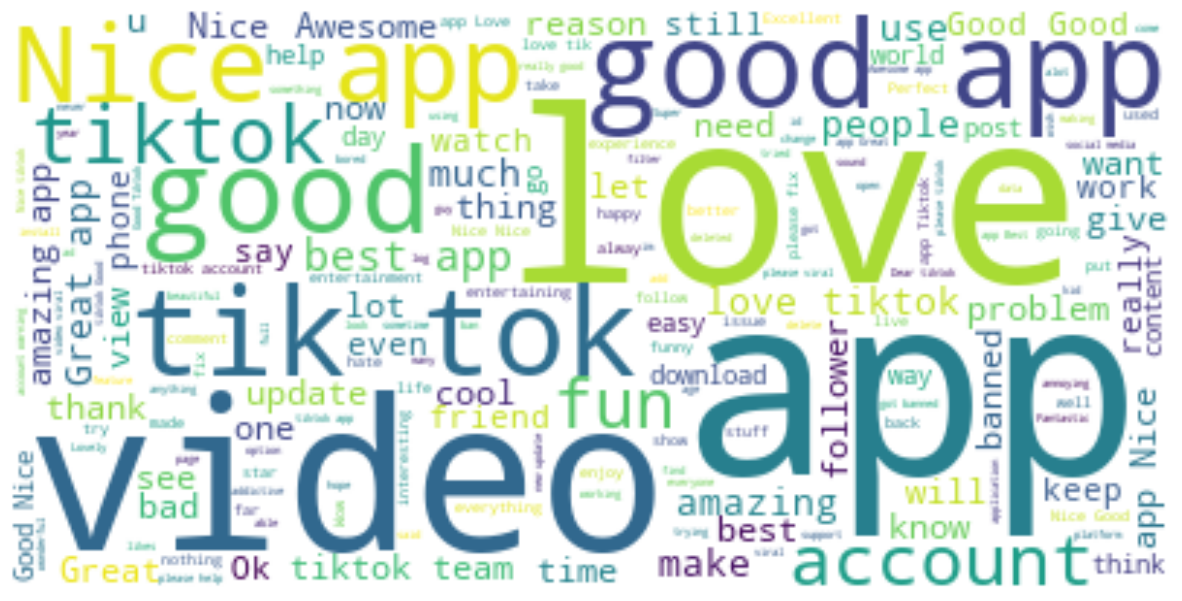

In [11]:
text = ' '.join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color= 'white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['content']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['content']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu']for i in data['content']]
data = data[['content', 'Positive', 'Negative', 'Neutral']]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaraneses\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                           No words     0.000     0.688   
1                              Great fun app so far!     0.719     0.000   
2  The app would get a higher rating but I litera...     0.000     0.073   
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...     0.561     0.000   
4                                Pictures and record     0.000     0.000   

   Neutral  
0    0.312  
1    0.281  
2    0.927  
3    0.439  
4    1.000  


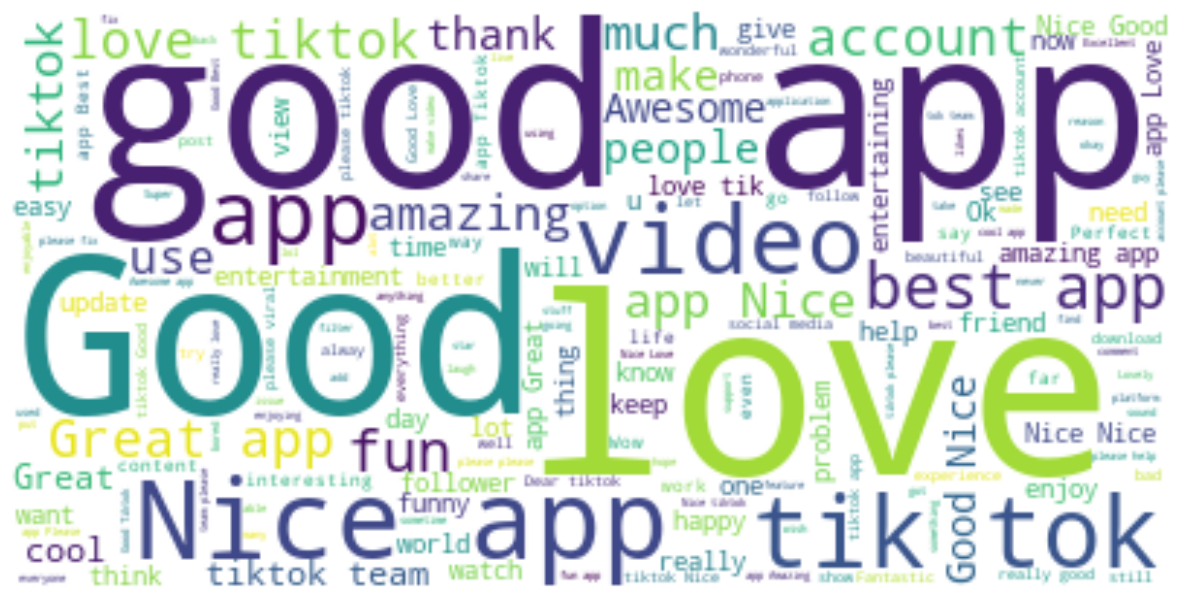

In [13]:
positive = ' '.join([i for i in data['content'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= 'white').generate(positive)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


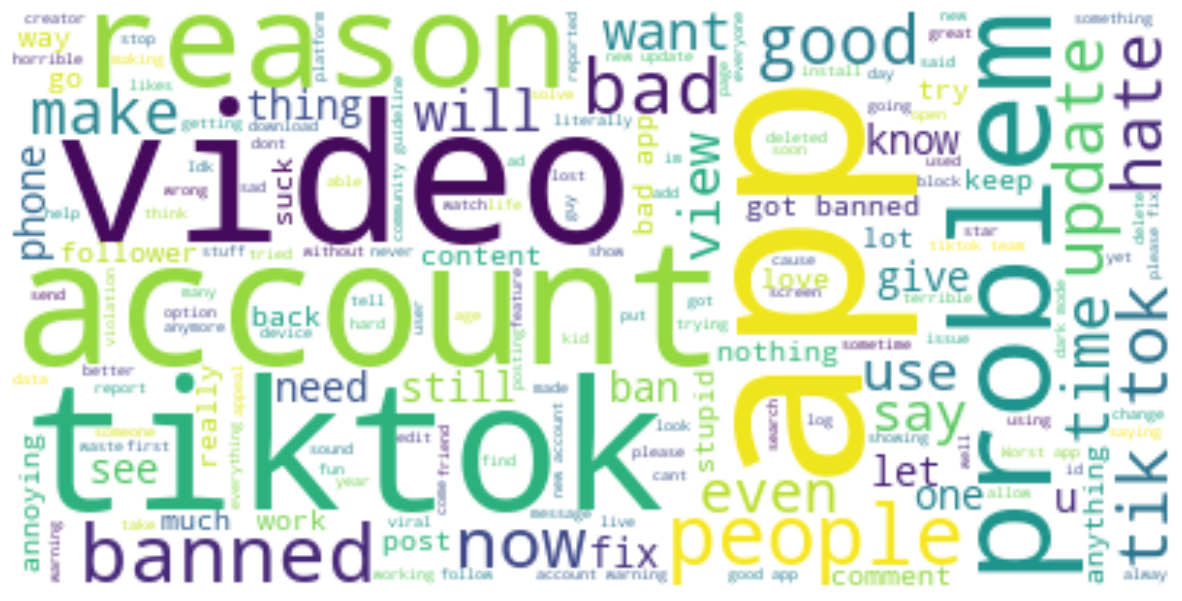

In [14]:
negative = ' '.join([i for i in data['content'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= 'white').generate(negative)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [15]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [16]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  196353.47899996064
Negative:  16512.73600000027
Neutral:  244154.79300007297
